In [1]:
#capture used for suppress output
#%%capture
from torch.utils.data import DataLoader
import deepchem as dc
from rdkit import Chem
import pandas as pd
import torch
from deepchem.models import AttentiveFPModel
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [2]:
from deepchem.utils.data_utils import load_from_disk

In [3]:
# csv_path = "data/raw/solubility.csv"
# df = pd.read_csv(csv_path)
dataset_file= "Data_Prep/solubility_1.csv"
dataset = load_from_disk(dataset_file)
print("Columns: %s" % str(dataset.columns.values))
print("Rows: %s" % str(dataset.shape[0]))
# d
# # smiles = ['CCC']
# # featurizer = dc.feat.Mol2VecFingerprint()
# # features = featurizer.featurize(smiles)
# # print(type(features))
# # print(features.shape)
# # print(features)

# with dc.utils.UniversalNamedTemporaryFile(mode='w') as tmpfile:
#   df.to_csv(tmpfile.name)
#   loader = dc.data.CSVLoader([], feature_field="SMILES",
#                              featurizer=dc.feat.MolGraphConvFeaturizer(use_edges=True))
#   dataset = loader.create_dataset(tmpfile.name)
# print(len(dataset))
# train_dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

Columns: ['Compound ID' 'InChIKey' 'SMILES' 'logS' 'logP' 'MW']
Rows: 9943


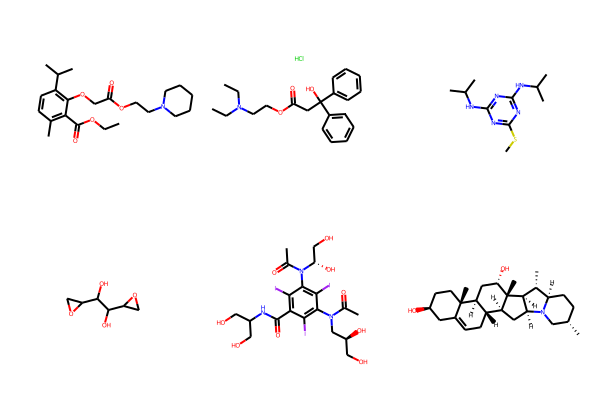

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice

molecules = [Chem.MolFromSmiles(smiles)
             for smiles in islice(dataset['SMILES'], 6)]

Draw.MolsToGridImage(molecules)

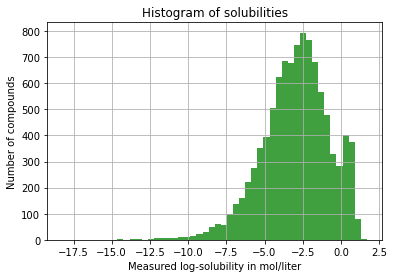

In [5]:
# splitter = dc.splits.RandomSplitter()
# train, valid, test = splitter.train_valid_test_split(dataset)
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

solubilities = np.array(dataset["logS"])
n, bins, patches = plt.hist(solubilities, 50, facecolor='green', alpha=0.75)
plt.xlabel('Measured log-solubility in mol/liter')
plt.ylabel('Number of compounds')
plt.title(r'Histogram of solubilities')
plt.grid(True)
plt.show()

In [6]:
loader = dc.data.CSVLoader(
      tasks=["Solubility"], feature_field="SMILES",
      featurizer=dc.feat.PagtnMolGraphFeaturizer())
dataset = loader.create_dataset(dataset_file)

In [7]:
dat

NameError: name 'dat' is not defined

In [ ]:
# num_epochs = 2000
# learning_rate = 0.01
#test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
splitter = dc.splits.ScaffoldSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)

In [ ]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))    

In [ ]:
# smiles = ["C1CCC1", "C1=CC=CN=C1"]
# labels = [0., 1.]
# featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
# X = featurizer.featurize(smiles)
# dataset = dc.data.NumpyDataset(X=X, y=labels)
# # training model
# model = AttentiveFPModel(mode='classification', n_tasks=1,
#    batch_size=16, learning_rate=0.001)
# loss = model.fit(dataset, nb_epoch=5)
train_mols = [Chem.MolFromSmiles(compound)
              for compound in train_dataset.ids]
Draw.MolsToGridImage(train_mols[:6])

In [ ]:
valid_mols = [Chem.MolFromSmiles(compound)
              for compound in valid_dataset.ids]
Draw.MolsToGridImage(valid_mols[:6])

In [ ]:
# transformers = [
#     dc.trans.MinMaxTransformer(transform_X=True, dataset=train_dataset)]

# for dataset in [train_dataset, valid_dataset, test_dataset]:
#   for transformer in transformers:
#       dataset = transformer.transform(dataset)

In [ ]:
len(train_dataset)

In [ ]:
torch.cuda.is_available()

In [ ]:
model = AttentiveFPModel(n_tasks=1,
   batch_size=128, learning_rate=0.001)
loss = model.fit(train_dataset, nb_epoch=500)